Design and implement a CNN for Image Classification a) Select a
suitable image classification dataset (medical imaging, agricultural,
etc.). b) Optimized with different hyperparameters including
learning rate, filter size, no. of layers, optiimizers, dropouts, etc.

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 104ms/step - accuracy: 0.2312 - loss: 2.1121 - val_accuracy: 0.3699 - val_loss: 1.7282
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.3971 - loss: 1.6724 - val_accuracy: 0.4266 - val_loss: 1.5769
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.4599 - loss: 1.5195 - val_accuracy: 0.4778 - val_loss: 1.4488
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 110ms/step - accuracy: 0.4825 - loss: 1.4439 - val_accuracy: 0.4958 - val_loss: 1.4037
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 117ms/step - accuracy: 0.5028 - loss: 1.3909 - val_accuracy: 0.5214 - val_loss: 1.3538
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 116ms/step - accuracy: 0.5232 - loss: 1.3505 - val_accuracy: 0.5243 - val_loss: 1.3432
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.5379 - loss: 1.3102 - val_accuracy: 0.5410 - val_loss: 1.3012
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 136ms/step - accuracy: 0.5545 - loss: 1

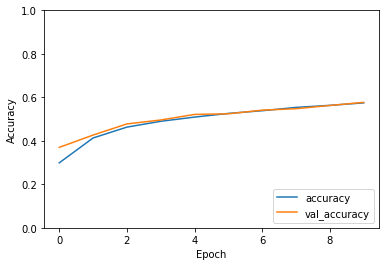

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preprocess the data
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Example images from the train set:


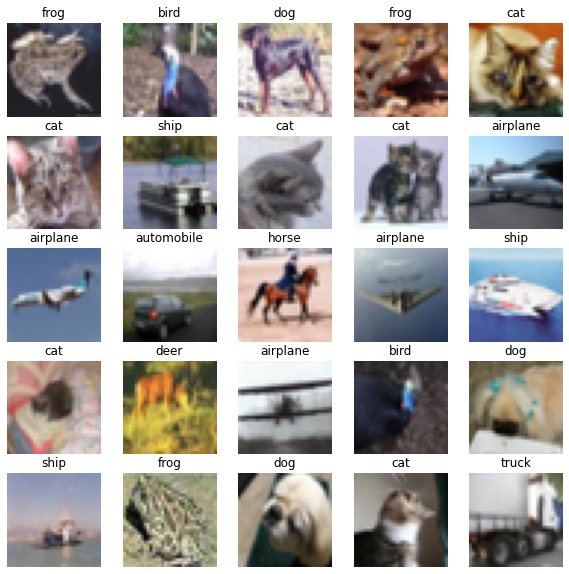

Example images from the test set:


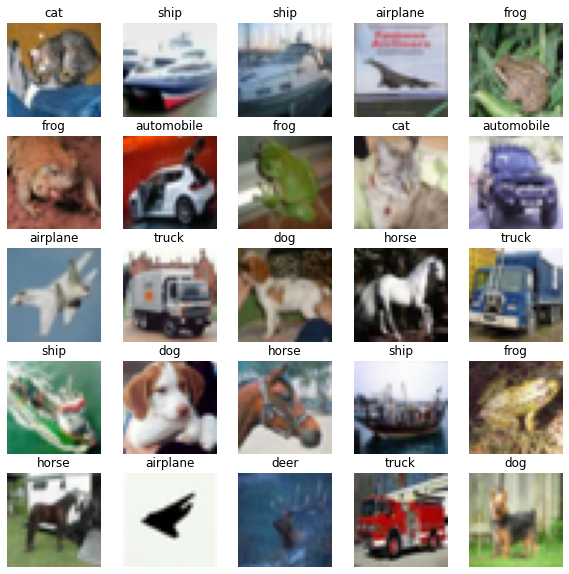

In [4]:

# Function to plot images
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_labels[labels[i][0]])
        plt.axis('off')
    plt.show()

# Print some example images from the train set
print("Example images from the train set:")
plot_images(x_train, y_train)

# Print some example images from the test set
print("Example images from the test set:")
plot_images(x_test, y_test)
